In [117]:
# From: https://en.wikipedia.org/w/index.php?title=List_of_world_records_in_Olympic_weightlifting&oldid=976512613
# World Standard interpolated points removed (an artifact of 2018 class redefinition.)
# Records maintained by IWF.

In [118]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from scipy import stats

In [137]:
records = pd.read_csv("Part3.csv")
records = records[records["Weight"] < 110] # Don't include 109+ / 87+ classes as they have no upper limit to the class
records["Record"] = records["Record"].apply(lambda x: float(x[:-3]))
records["Log10Weight"] = np.log10(records["Weight"])
records["Log10Record"] = np.log10(records["Record"])

total = records[records["Event"] == "Total"]
snatch = records[records["Event"] == "Snatch"]
clean_jerk = records[records["Event"] == "Clean & Jerk"]
# records

Slope: 0.571936 -- R: 0.992268 (R^2: 0.984597), P_val: 1.005347E-05
1.0268645646499708 Weight                          73
Event                        Total
Record                         363
Athlete                Shi Zhiyong
Date                     21-Sep-19
Meet           World Championships
sex                              M
Log10Weight                1.86332
Log10Record                2.55991
Name: 10, dtype: object
Slope: 0.519961 -- R: 0.987313 (R^2: 0.974786), P_val: 2.404344E-04
1.0329088144000724 Weight                          73
Event                       Snatch
Record                         168
Athlete                Shi Zhiyong
Date                     22-Apr-19
Meet           Asian Championships
sex                              M
Log10Weight                1.86332
Log10Record                2.22531
Name: 8, dtype: object
Slope: 0.558673 -- R: 0.995240 (R^2: 0.990502), P_val: 2.995146E-06
Slope: 0.622654 -- R: 0.980560 (R^2: 0.961497), P_val: 5.632148E-04
Slope: 0.6331

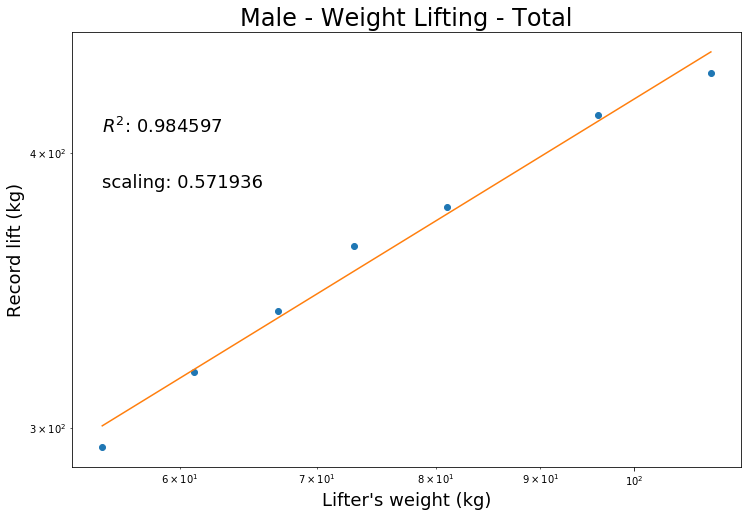

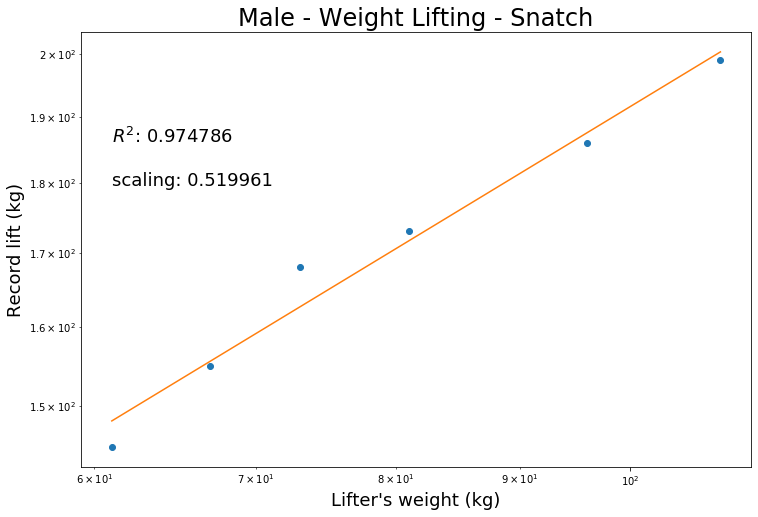

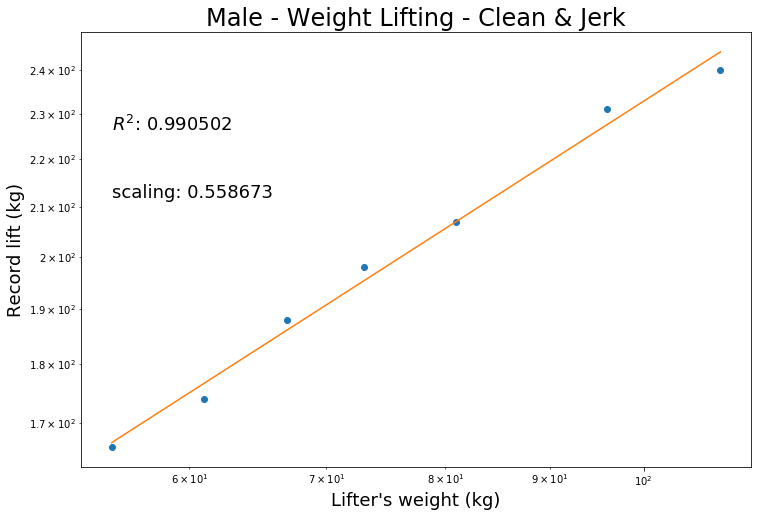

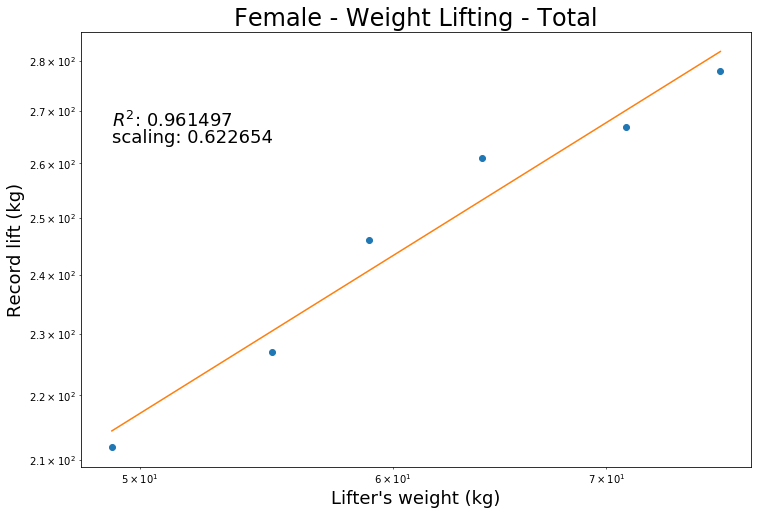

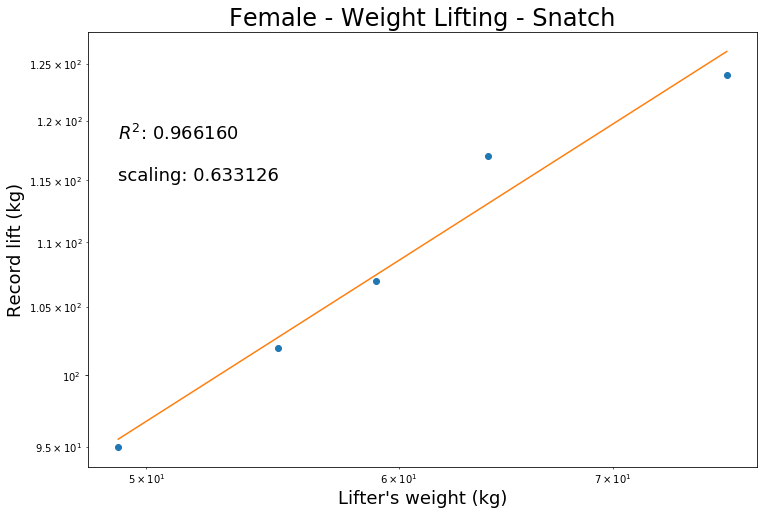

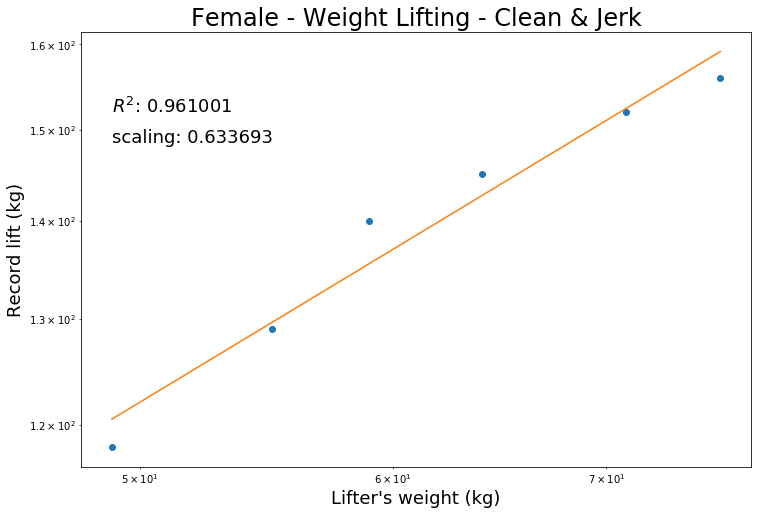

In [171]:
best_overall = 0, None
for sex in ["M", "F"]:
    for df in [total, snatch, clean_jerk]:
        df = df[df["sex"] == sex]  
        event_type = df["Event"].values[0]

        sex_str = "Male" if sex == "M" else "Female"
        slope, intercept, r_value, p_value, std_err = stats.linregress(df["Log10Weight"], df["Log10Record"])
        predict = lambda radius: intercept + slope * radius
        
        print("Slope: %.6f -- R: %.6f (R^2: %.6f), P_val: %.6E"%( slope, r_value, r_value**2, p_value))
        
        predicted_lift = np.power(10, predict(df["Log10Weight"]))
        residual_lift = df["Record"] / predicted_lift
        residual_max = residual_lift.argmax()
        if residual_lift.iloc[residual_max] > best_overall[0]:
            print( residual_lift.iloc[residual_max], df.iloc[residual_max])
            best_overall= (residual_lift.iloc[residual_max], df.iloc[residual_max])

        fig, ax = plt.subplots(1, figsize=(12,8))
        ax.scatter(df["Weight"], df["Record"], c="C0")
        ax.plot(df["Weight"], predicted_lift, c="C1")
        ax.set_yscale("log")
        ax.set_xscale("log")

        ax.set_title("%s - Weight Lifting - %s"%(sex_str, event_type), fontsize=24)
        ax.set_xlabel(r"Lifter's weight (kg)", fontsize=18)
        ax.set_ylabel(r"Record lift (kg)", fontsize=18)
        ax.text(np.min(df["Weight"]), np.percentile(df["Record"], 80), r"$R^2$: %.6f"%(r_value**2), fontsize=18)
        ax.text(np.min(df["Weight"]), np.percentile(df["Record"], 70), r"scaling: %.6f"%(slope), fontsize=18)
        plt.savefig("part3%s%s.pdf"%(sex_str, event_type), bbox_inches='tight', pad_inches=0)
